In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Data

df = pd.read_csv('marketing ad data.csv')
print(df.head())
print(df.info())
print(df.describe())


   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04      $16,174.00   6.29      Chicago   Spanish   
1   Google Ads             0.12      $11,566.00   5.61     New York    German   
2      YouTube             0.07      $10,200.00   7.18  Los Angeles    French   
3      YouTube             0.11      $12,724.00   5.55        Miami  Mandarin   
4      YouTube             0.05      $16,452.00   6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [4]:

# Data Cleaning

df['Acquisition_Cost'] = df['Acquisition_Cost'].astype(str).str.replace('$','').str.replace(',','').astype(float)
df['Date'] = pd.to_datetime(df['Date'])
print(df.isnull().sum())

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64


In [5]:
# Derived Metrics

df['Estimated_Conversions'] = df['Impressions'] * df['Conversion_Rate']
df['CTR'] = df['Clicks'] / df['Impressions']
df['CPA'] = df['Acquisition_Cost'] / df['Estimated_Conversions']
print(df[['Estimated_Conversions', 'CTR', 'CPA']].describe())

       Estimated_Conversions            CTR            CPA
count          200000.000000  200000.000000  200000.000000
mean              440.668946       0.140405      63.313228
std               322.707024       0.130881      96.651806
min                10.010000       0.010054       3.342676
25%               178.040000       0.058606      18.034073
50%               359.040000       0.099789      33.315114
75%               641.710000       0.169699      68.978203
max              1500.000000       0.992024    1989.610390


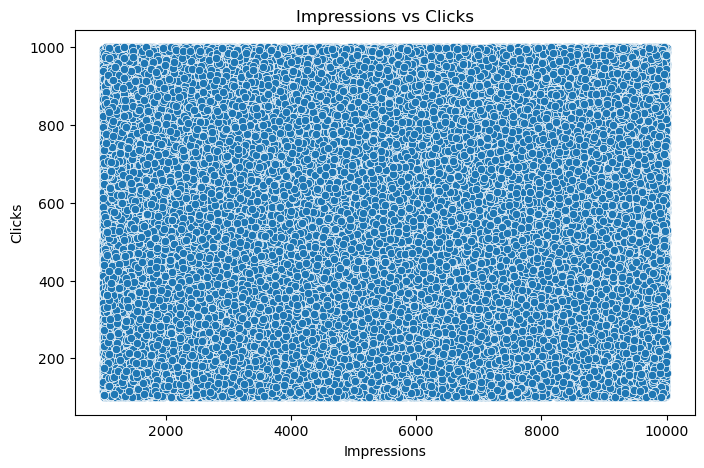

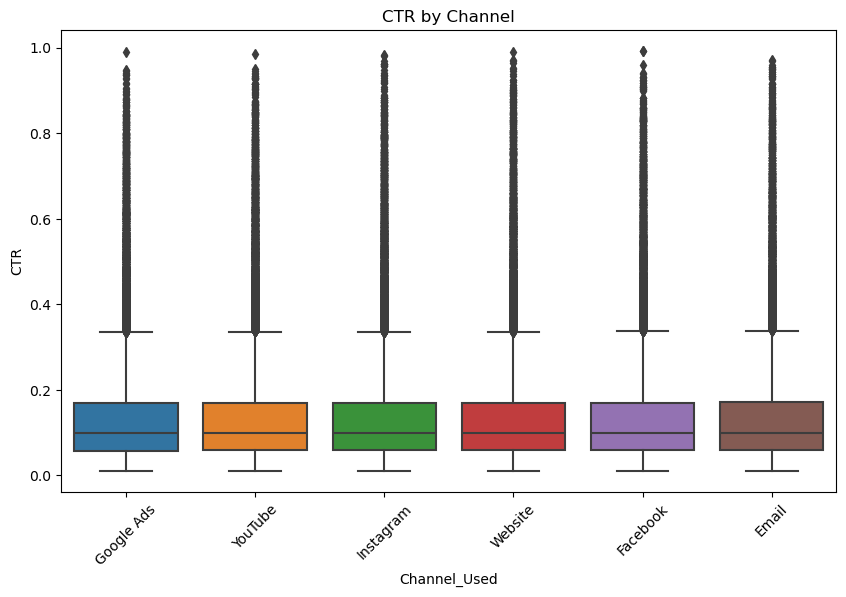

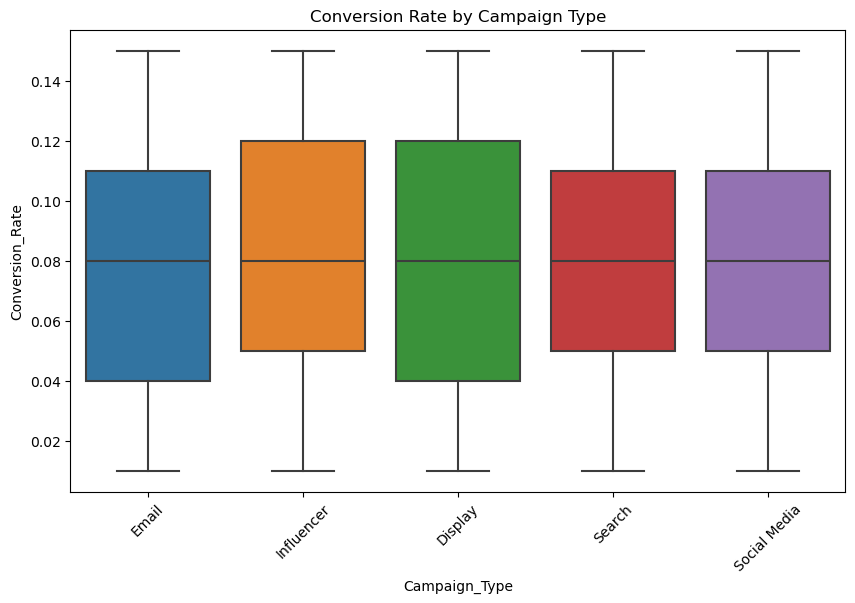

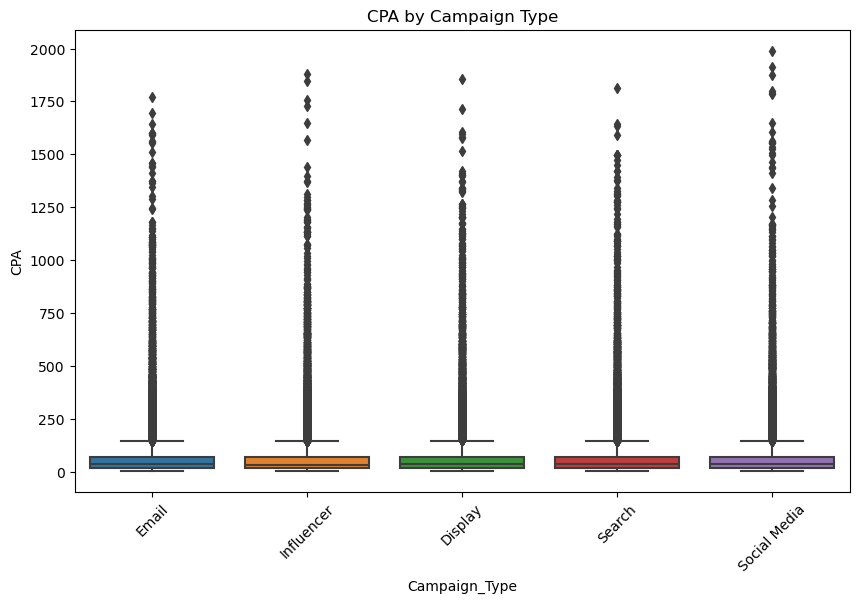

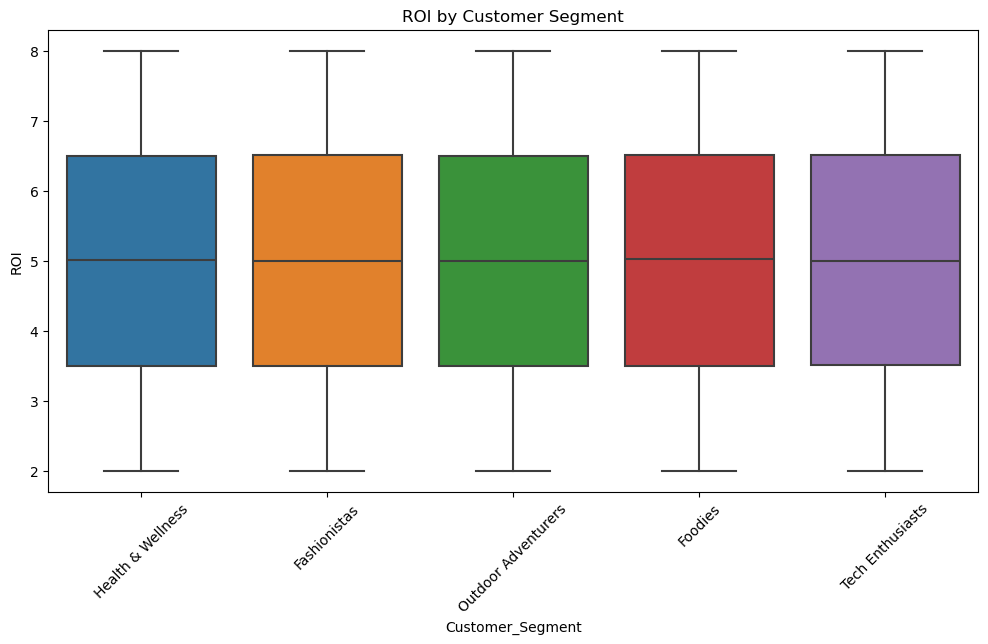

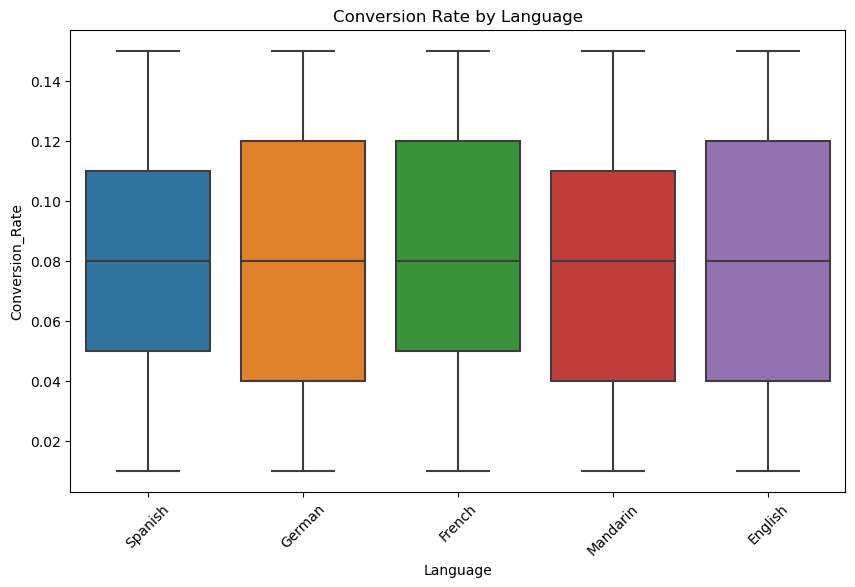

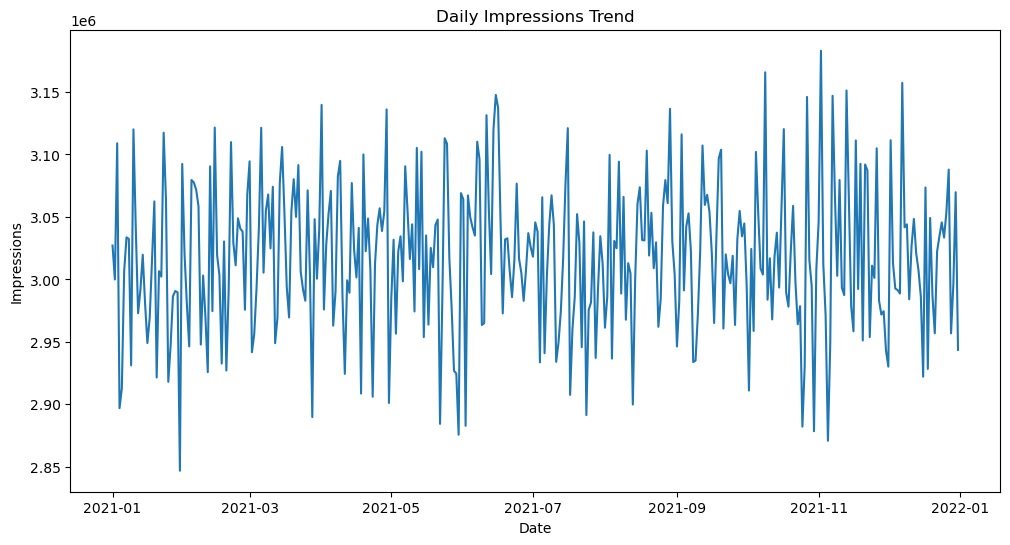

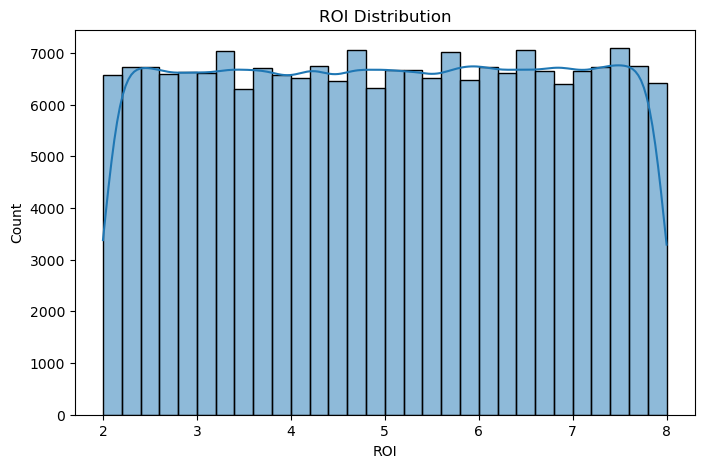

In [6]:
#  EDA Plots

plt.figure(figsize=(8,5))
sns.scatterplot(x='Impressions', y='Clicks', data=df)
plt.title('Impressions vs Clicks')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Channel_Used', y='CTR', data=df)
plt.title('CTR by Channel')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Campaign_Type', y='Conversion_Rate', data=df)
plt.title('Conversion Rate by Campaign Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Campaign_Type', y='CPA', data=df)
plt.title('CPA by Campaign Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Customer_Segment', y='ROI', data=df)
plt.title('ROI by Customer Segment')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Language', y='Conversion_Rate', data=df)
plt.title('Conversion Rate by Language')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
df_daily = df.groupby('Date').agg({'Impressions':'sum'}).reset_index()
sns.lineplot(x='Date', y='Impressions', data=df_daily)
plt.title('Daily Impressions Trend')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['ROI'], bins=30, kde=True)
plt.title('ROI Distribution')
plt.show()

In [7]:
#  Advanced Hypothesis Tests

# H1: Display vs Email Conversion
email_cr = df[df['Campaign_Type'] == 'Email']['Conversion_Rate']
display_cr = df[df['Campaign_Type'] == 'Display']['Conversion_Rate']
t_stat, p_val = ttest_ind(display_cr, email_cr, nan_policy='omit')
print(f"\nH1: Display vs Email Conversion Rate\nT-stat: {t_stat:.4f}, P-val (two-tailed): {p_val:.4f}")
p_one_tailed = p_val/2 if t_stat > 0 else 1-(p_val/2)
print(f"One-tailed P: {p_one_tailed:.4f}")



H1: Display vs Email Conversion Rate
T-stat: 1.0420, P-val (two-tailed): 0.2974
One-tailed P: 0.1487


In [8]:
# H2: YouTube vs Google Ads CTR
yt_ctr = df[df['Channel_Used']=='YouTube']['CTR']
gg_ctr = df[df['Channel_Used']=='Google Ads']['CTR']
t_stat2, p_val2 = ttest_ind(yt_ctr, gg_ctr, nan_policy='omit')
print(f"\nH2: YouTube vs Google Ads CTR\nT-stat: {t_stat2:.4f}, P-val (two-tailed): {p_val2:.4f}")
p_one2 = p_val2/2 if t_stat2 > 0 else 1-(p_val2/2)
print(f"One-tailed P: {p_one2:.4f}")


H2: YouTube vs Google Ads CTR
T-stat: 1.9784, P-val (two-tailed): 0.0479
One-tailed P: 0.0239


In [9]:
# H3: ANOVA Location
top_loc = df.groupby('Location')['Acquisition_Cost'].sum().nlargest(5).index
df_top = df[df['Location'].isin(top_loc)]
loc_groups = [df_top[df_top['Location']==l]['Conversion_Rate'] for l in top_loc]
f_stat, p_val3 = f_oneway(*loc_groups)
print(f"\nH3: ANOVA Conversion by Top Locations\nF: {f_stat:.4f}, P: {p_val3:.4f}")


H3: ANOVA Conversion by Top Locations
F: 0.2463, P: 0.9120


In [10]:
# H4: Correlation Engagement & CPA
corr = df['Engagement_Score'].corr(df['CPA'])
print(f"\nH4: Corr Engagement vs CPA: {corr:.4f}")


H4: Corr Engagement vs CPA: -0.0018


In [11]:

# H5: Chi-square Customer Segment vs Campaign Type
cross = pd.crosstab(df['Customer_Segment'], df['Campaign_Type'])
chi2, p_chi, dof, ex = chi2_contingency(cross)
print(f"\nH5: Chi2 Segment vs Campaign\nChi2: {chi2:.4f}, P: {p_chi:.4f}")


H5: Chi2 Segment vs Campaign
Chi2: 14.2767, P: 0.5781


In [12]:

# HYPOTHESIS TEST 6: ANOVA — Conversion Rate by Day of Week
# -----------------------------------------------------------
# BUSINESS CONTEXT:
# Marketers want to know if conversions differ by day (Mon, Tue, ...).
# This test checks if mean conversion rates are the same or not.

# Null Hypothesis (H0): Mean conversion rate is equal for all days.
# Alternative Hypothesis (H1): At least one day's mean conversion rate is different.

# Step 1: Create a new column for Day of the Week
df['DayOfWeek'] = df['Date'].dt.day_name()

# Step 2: Group by day and collect conversion rates
groups = [group['Conversion_Rate'] for name, group in df.groupby('DayOfWeek')]

# Step 3: Run ANOVA test
anova_stat, anova_p = f_oneway(*groups)

print(f"\n📌 Hypothesis 6: Conversion Rate by Day of Week")
print(f"H0: All days equal | H1: At least one day differs")
print(f"F-statistic: {anova_stat:.4f}, P-value: {anova_p:.4f}")

# Step 4: Interpret result
if anova_p < 0.05:
    print(f"✅ Reject Null: Conversion rate differs by day of week.")
else:
    print(f"❌ Fail to Reject Null: No significant difference by day.")



📌 Hypothesis 6: Conversion Rate by Day of Week
H0: All days equal | H1: At least one day differs
F-statistic: 0.9777, P-value: 0.4383
❌ Fail to Reject Null: No significant difference by day.


In [13]:

# HYPOTHESIS TEST 7: Campaign Duration vs ROI
# ---------------------------------------------
# BUSINESS CONTEXT:
# Does running longer campaigns deliver better ROI?
# We'll compare short vs long campaigns using T-test.

# Null Hypothesis (H0): Mean ROI is the same for short and long campaigns.
# Alternative Hypothesis (H1): Mean ROI is different.

# Step 1: Convert 'Duration' text to numeric days
df['Duration_Days'] = df['Duration'].str.replace(' days','').astype(int)

# Step 2: Define short vs long using median split
median_duration = df['Duration_Days'].median()
long_campaigns = df[df['Duration_Days'] >= median_duration]['ROI']
short_campaigns = df[df['Duration_Days'] < median_duration]['ROI']

# Step 3: Run T-test
t_stat, p_val = ttest_ind(long_campaigns, short_campaigns, nan_policy='omit')

print(f"\n📌 Hypothesis 7: ROI by Campaign Duration")
print(f"H0: No difference | H1: ROI differs between short & long")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Step 4: Interpret result
if p_val < 0.05:
    print(f"✅ Reject Null: ROI differs by campaign duration.")
else:
    print(f"❌ Fail to Reject Null: No significant difference by duration.")



📌 Hypothesis 7: ROI by Campaign Duration
H0: No difference | H1: ROI differs between short & long
T-statistic: 0.8487, P-value: 0.3960
❌ Fail to Reject Null: No significant difference by duration.


In [ ]:
# -----------------------------
df.to_csv('processed_campaign_performance.csv', index=False)
print("✅ Processed CSV saved!")

✅ Processed CSV saved!
